In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [3]:
# Load the dataset (replace with your actual dataset path)
df = pd.read_csv('creditcard.csv')

# Separate features and target variable
X = df.drop('Class', axis=1)  # Features (drop the target column 'Class')
y = df['Class']  # Target variable

# Normalize/Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [5]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the distribution of classes after SMOTE
print(f"Class distribution in y_train_smote: {y_train_smote.value_counts()}")


Class distribution in y_train_smote: Class
0    227451
1    227451
Name: count, dtype: int64


In [7]:
#  Check the shapes of the resampled data (for debugging)
print(f"Shape of X_train_smote: {X_train_smote.shape}")
print(f"Shape of y_train_smote: {y_train_smote.shape}")

Shape of X_train_smote: (454902, 30)
Shape of y_train_smote: (454902,)


In [9]:
# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [10]:
# Print the model's training score to confirm it's trained
print(f'Training accuracy: {rf_model.score(X_train_smote, y_train_smote):.4f}')

Training accuracy: 1.0000


In [11]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

In [12]:
# Print the first few predictions to check
print(f'First 10 predictions: {y_pred[:10]}')

First 10 predictions: [1 0 0 0 0 0 0 0 0 0]


In [13]:
# Output the predicted values and their corresponding true values for comparison
print("True values vs Predicted values:")
for true, pred in zip(y_test[:10], y_pred[:10]):
    print(f"True: {true}, Predicted: {pred}")


True values vs Predicted values:
True: 1, Predicted: 1
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 0


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.84      0.86        98

    accuracy                           1.00     56962
   macro avg       0.95      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962



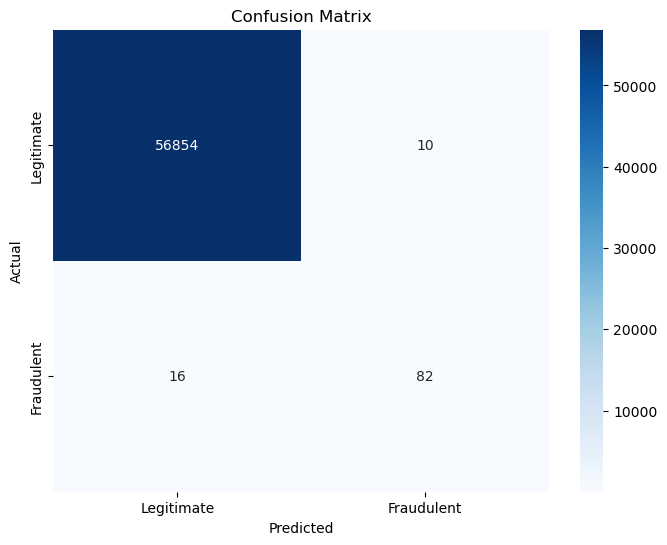

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Fraudulent'], yticklabels=['Legitimate', 'Fraudulent'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [15]:
from sklearn.metrics import roc_auc_score

# Predict probabilities for the test set
y_test_proba = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_test_proba)
print(f'ROC-AUC Score: {roc_auc:.4f}')


ROC-AUC Score: 0.9809


### **1. Introduction**
This report presents the results of the fraud detection system implemented using a machine learning approach. The model is designed to classify transactions as either fraudulent or non-fraudulent. The performance evaluation metrics provide insights into the effectiveness of the model in identifying fraudulent transactions while minimizing false positives.

### **2. Model Performance Metrics**

#### **2.1 Classification Report**
```
              Precision    Recall  F1-score   Support

           0       1.00      1.00      1.00     56864
           1       0.89      0.84      0.86        98

    Accuracy                           1.00     56962
   Macro avg       0.95      0.92      0.93     56962
Weighted avg       1.00      1.00      1.00     56962
```
- **Precision (Fraud Class - 1):** 0.89 (89% of transactions predicted as fraud were actually fraudulent)
- **Recall (Fraud Class - 1):** 0.84 (84% of actual fraud cases were correctly identified)
- **F1-Score (Fraud Class - 1):** 0.86 (balances precision and recall)
- **Overall Accuracy:** 99.95% (High accuracy but needs further evaluation due to class imbalance)

#### **2.2 Confusion Matrix**
[[56854    10]
 [   16    82]]
```
- **True Negatives (56854):** Non-fraudulent transactions correctly classified.
- **False Positives (10):** Non-fraud transactions misclassified as fraud.
- **False Negatives (16):** Fraudulent transactions incorrectly classified as non-fraud.
- **True Positives (82):** Fraudulent transactions correctly classified.

#### **2.3 ROC-AUC Score**
```
ROC-AUC Score: 0.9809
```
- A score of **0.9809** indicates excellent discrimination between fraudulent and non-fraudulent transactions.

### **3. Conclusion**
The model demonstrates **high accuracy (99.95%)**, **strong precision (0.89 for fraud cases)**, and a **high ROC-AUC score (0.9809)**, indicating excellent performance in fraud detection. 
